In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Loan_prediction_BTC
!ls

/content/drive/MyDrive/Loan_prediction_BTC
 plot_roc_curve.py  'Sample Prediction Dataset.csv'   Training_data.csv
 __pycache__	     Test_data.csv		      Untitled.ipynb


#Loan Prediction Based on Customer Behavior



The risk_flag indicates whether there has been a default in the past or not.

In [ ]:
#Importing Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
data = pd.read_csv('Training_data.csv')
dfloan = data.copy()

In [ ]:
data.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
data.tail(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [ ]:
dfloan.shape

(252000, 13)

**BASIC STRUCTURE**


In [ ]:
dfloan.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

DATA TYPE

In [ ]:
dfloan.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [ ]:
dfloan.describe(include=["O"])

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


In [ ]:
dfloan.describe(include='all')

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000,252000,252000,252000,252000,252000,252000.000000,252000.000000,252000.000000
unique,NaN,NaN,NaN,NaN,2,3,2,51,317,29,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,226272,231898,176000,5957,1259,28400,NaN,NaN,NaN
mean,126000.500000,4.997117e+06,49.954071,10.084437,NaN,NaN,NaN,NaN,NaN,NaN,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,NaN,NaN,NaN,NaN,NaN,NaN,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,13.000000,0.000000


Completness

In [ ]:
dfloan.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

**Exploration** 



Exploration of Complete & Important Variables

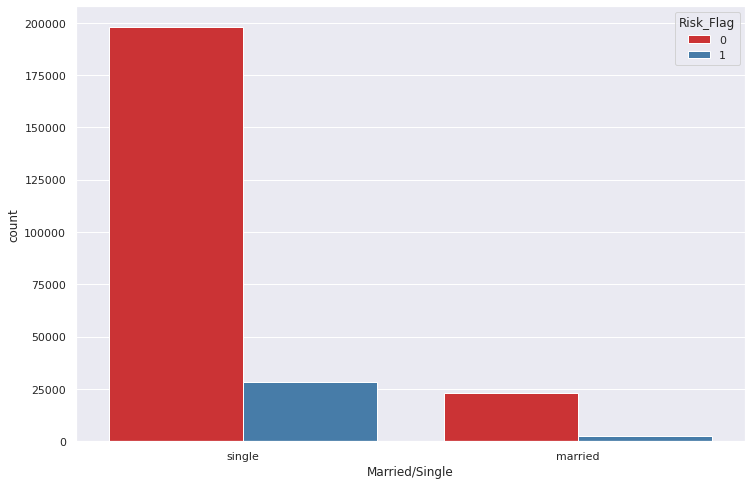

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Married/Single', hue='Risk_Flag', data=dfloan, palette='Set1');

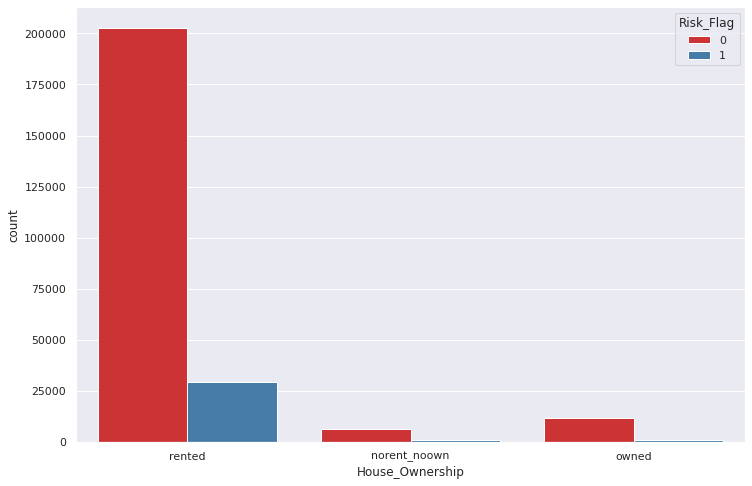

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=dfloan, palette='Set1');

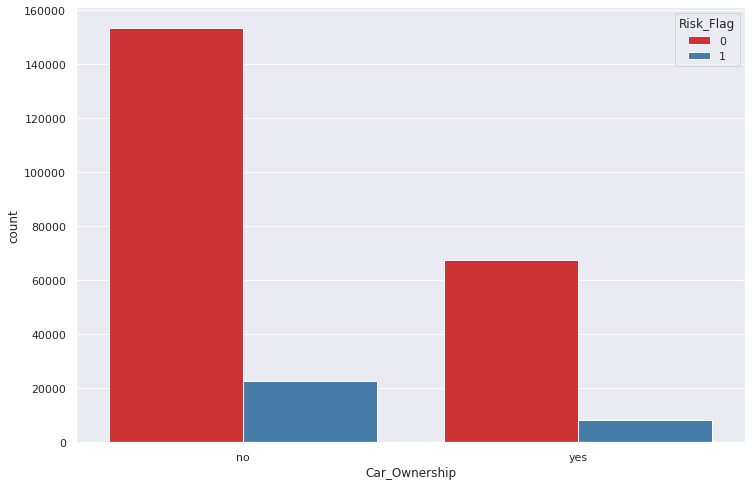

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=dfloan, palette='Set1',);

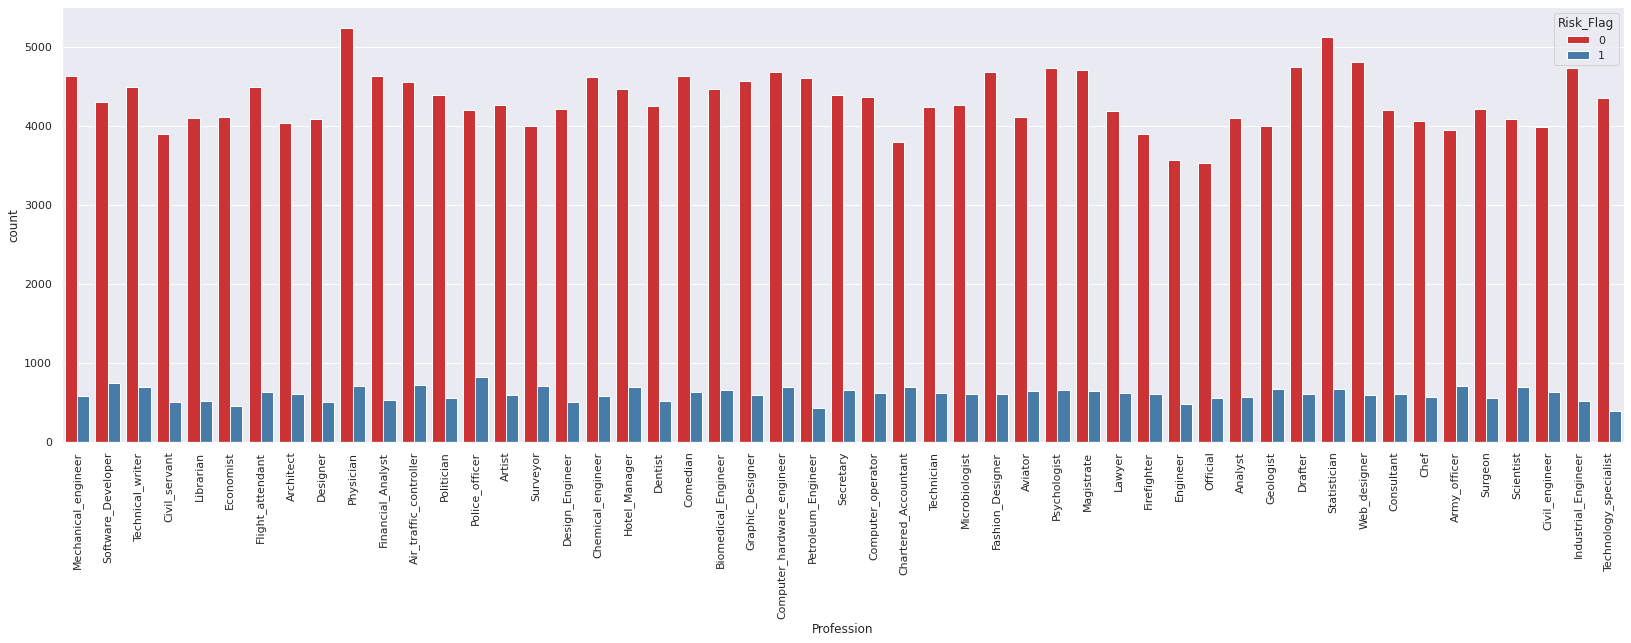

In [ ]:
plt.figure(figsize=(28,8))
chart = sns.countplot(x='Profession', hue='Risk_Flag', data=dfloan, palette='Set1');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

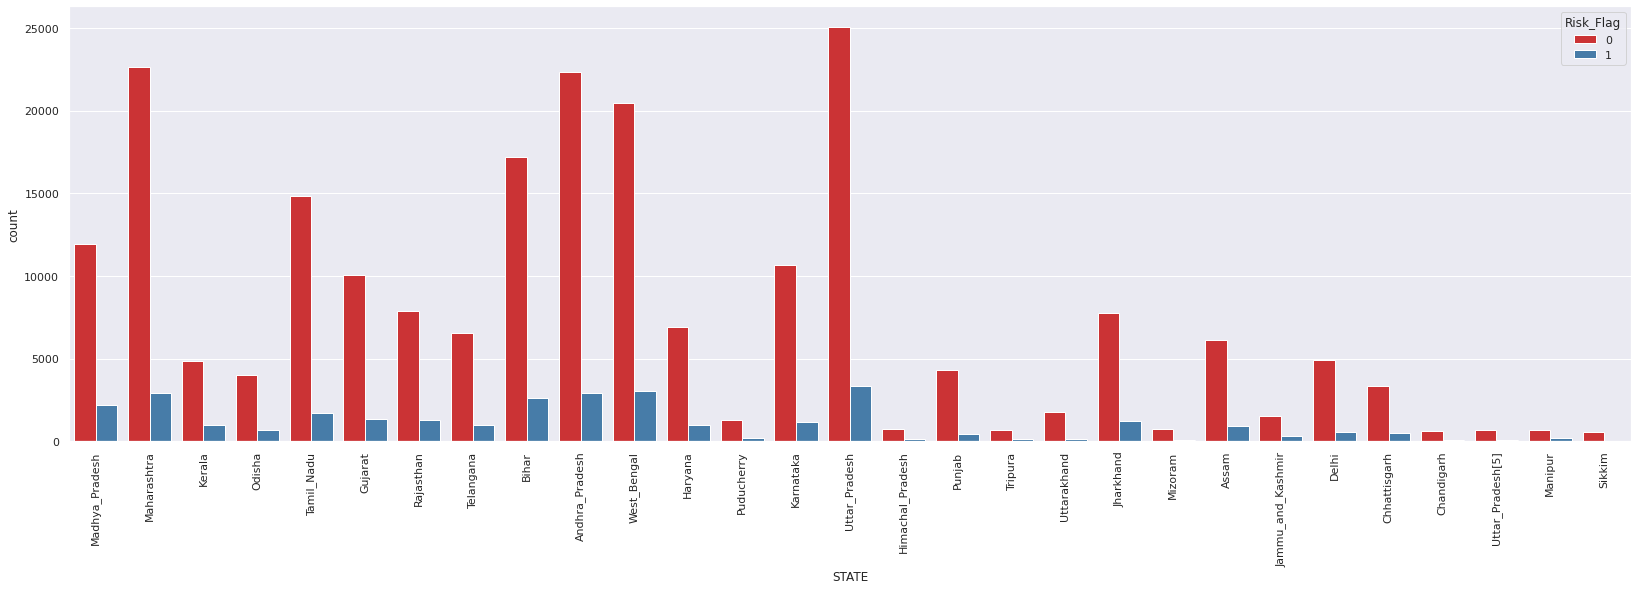

In [ ]:
plt.figure(figsize=(28,8))
chart = sns.countplot(x='STATE', hue='Risk_Flag', data=dfloan, palette='Set1');
chart.set_xticklabels(chart.get_xticklabels(), rotation=90);

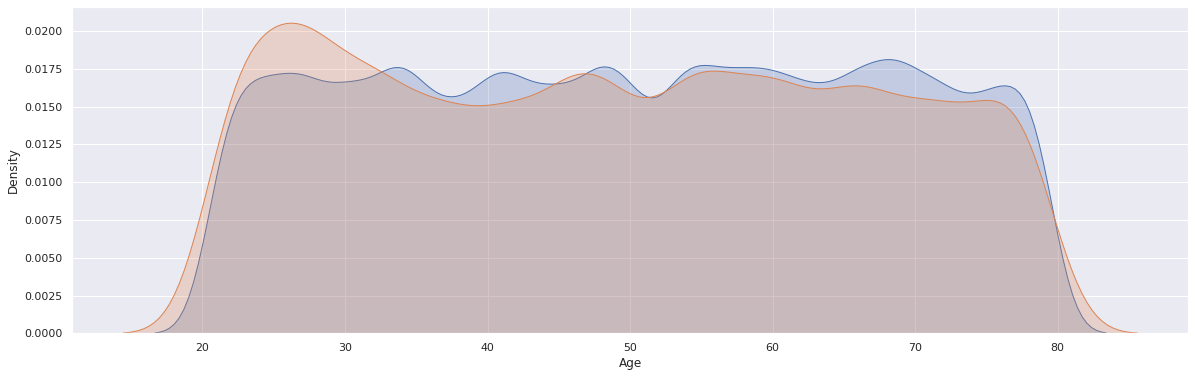

In [ ]:
plt.subplots(figsize=(20,6))
sns.kdeplot(dfloan[dfloan['Risk_Flag'] == 0]['Age'], shade=True,label='Non Defaulters');
sns.kdeplot(dfloan[dfloan['Risk_Flag'] == 1]['Age'], shade=True,label='Loan Defaulters');

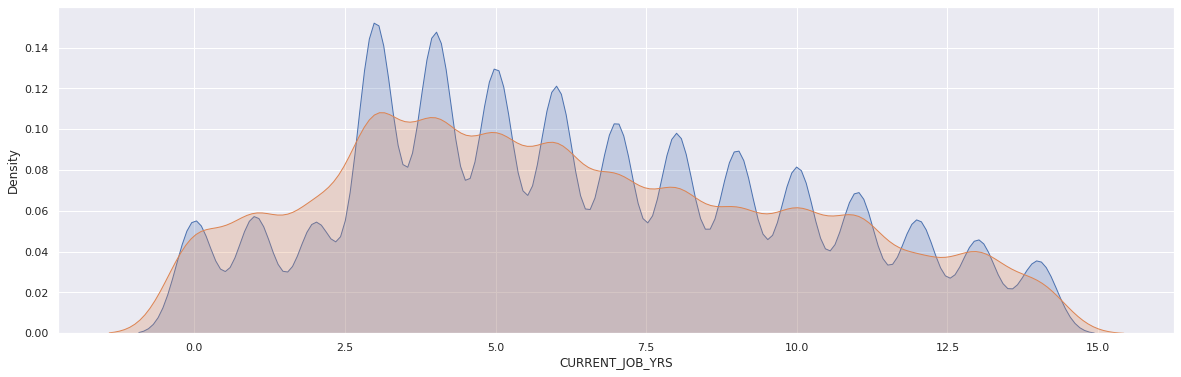

In [ ]:
plt.subplots(figsize=(20,6));
sns.kdeplot(dfloan[dfloan['Risk_Flag'] == 0]['CURRENT_JOB_YRS'], shade=True,label='Non Defaulters');
sns.kdeplot(dfloan[dfloan['Risk_Flag'] == 1]['CURRENT_JOB_YRS'], shade=True,label='Loan Defaulters');

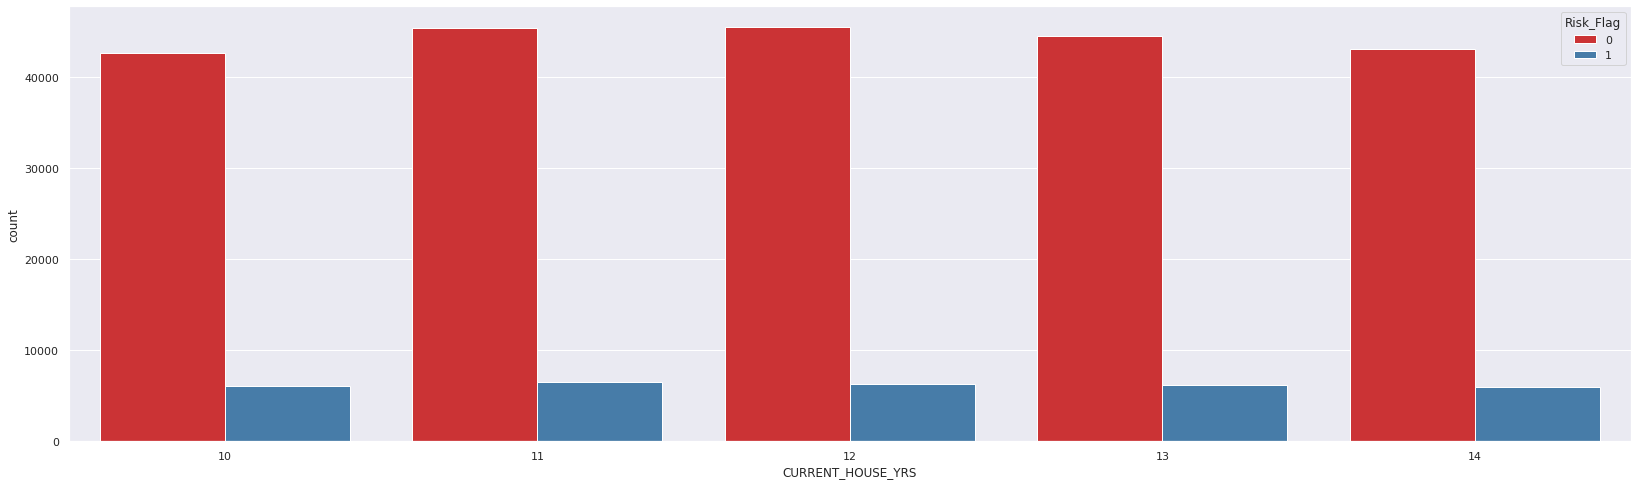

In [ ]:
plt.figure(figsize=(28,8));
ax = sns.countplot(x='CURRENT_HOUSE_YRS', hue='Risk_Flag', data=dfloan, palette='Set1')

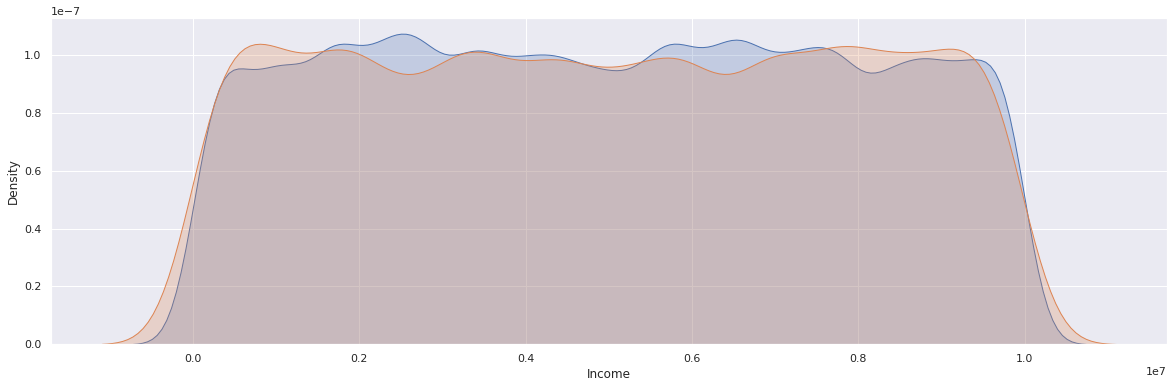

In [ ]:
plt.subplots(figsize=(20,6));
sns.kdeplot(dfloan[dfloan['Risk_Flag'] == 0]['Income'], shade=True,label='Non Defaulters');
sns.kdeplot(dfloan[dfloan['Risk_Flag'] == 1]['Income'], shade=True,label='Loan Defaulters');

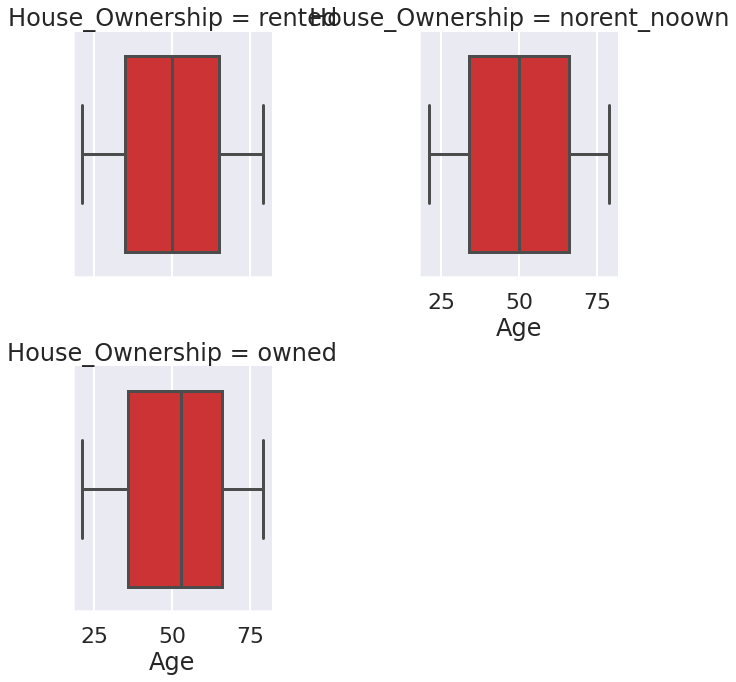

In [ ]:
#plt.subplots(figsize=(20,6));
sns.set_context('poster');
sns.catplot(kind='box', x='Age', col='House_Ownership', data=dfloan,col_wrap=2,palette='Set1');

# Feature Selection 
(Correlation)

In [ ]:
dfloan.head(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
dfloan1 = dfloan.copy()
dfloan1['Married/Single_Cat'] = labelencoder.fit_transform(dfloan['Married/Single'])
dfloan1['House_Ownership_Cat'] = labelencoder.fit_transform(dfloan['House_Ownership'])
dfloan1['Car_Ownership_Cat'] = labelencoder.fit_transform(dfloan['Car_Ownership'])
dfloan1['Profession_Cat'] = labelencoder.fit_transform(dfloan['Profession'])
dfloan1['CITY_Cat'] = labelencoder.fit_transform(dfloan['CITY'])
dfloan1['STATE_Cat'] = labelencoder.fit_transform(dfloan['STATE']);
dfloan1.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_Cat,House_Ownership_Cat,Car_Ownership_Cat,Profession_Cat,CITY_Cat,STATE_Cat
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1,2,0,33,251,13
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,1,2,0,43,227,14
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0,2,0,47,8,12
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,2,1,43,54,17
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,1,2,0,11,296,22


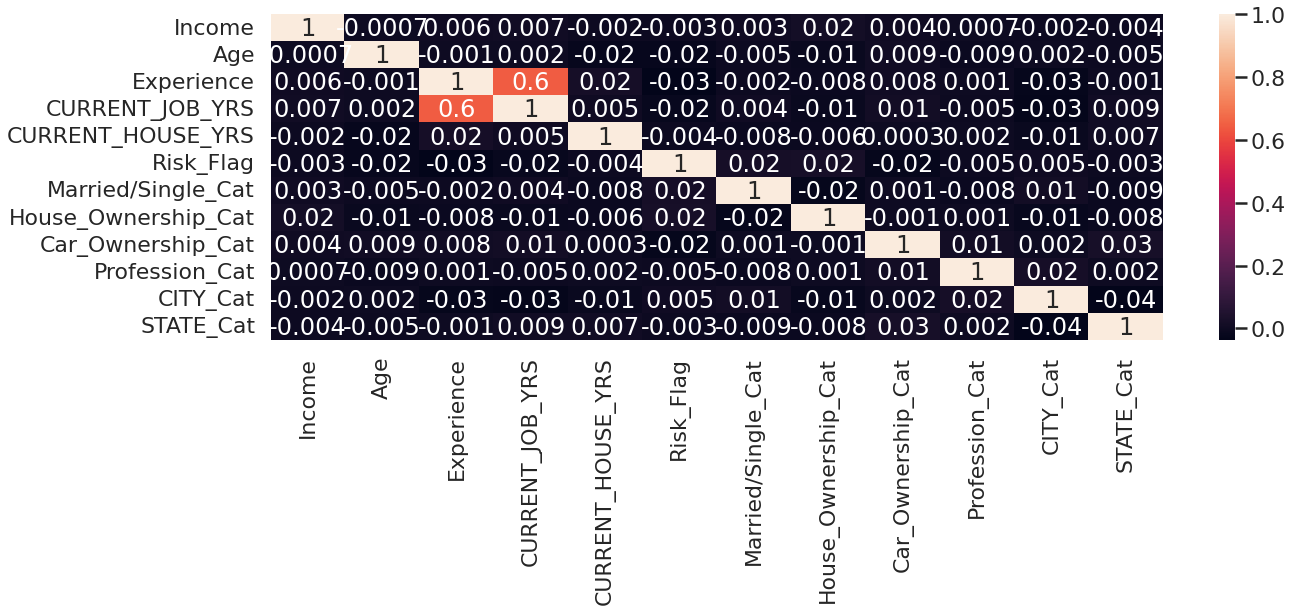

In [ ]:
sns.set_context('poster')
plt.figure(figsize=(20,6))
cor = dfloan1.drop('Id',axis=1).corr()
sns.heatmap(cor, annot=True, fmt='.1g');

In [ ]:
drop_features = ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE','CURRENT_JOB_YRS']
dfloan1.drop(drop_features,axis=1,inplace=True)

In [ ]:
# Modelling

In [ ]:
dfloan1.head()

,Id,Income,Age,Experience,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_Cat,House_Ownership_Cat,Car_Ownership_Cat,Profession_Cat,CITY_Cat,STATE_Cat
0,1,1303834,23,3,13,0,1,2,0,33,251,13
1,2,7574516,40,10,13,0,1,2,0,43,227,14
2,3,3991815,66,4,10,0,0,2,0,47,8,12
3,4,6256451,41,2,12,1,1,2,1,43,54,17
4,5,5768871,47,11,14,1,1,2,0,11,296,22


Spliting the data into training and testing set and set the random state to 100

X & Y differentiate

In [ ]:
X = X = dfloan1.drop(['Id','Risk_Flag'], axis=1)
Y = dfloan1[['Risk_Flag']]

In [ ]:
X.head()

,Income,Age,Experience,CURRENT_HOUSE_YRS,Married/Single_Cat,House_Ownership_Cat,Car_Ownership_Cat,Profession_Cat,CITY_Cat,STATE_Cat
0,1303834,23,3,13,1,2,0,33,251,13
1,7574516,40,10,13,1,2,0,43,227,14
2,3991815,66,4,10,0,2,0,47,8,12
3,6256451,41,2,12,1,2,1,43,54,17
4,5768871,47,11,14,1,2,0,11,296,22


In [ ]:
Y.head()

,Risk_Flag
0,0
1,0
2,0
3,1
4,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2, random_state=100, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(201600, 10) (201600, 1)
(50400, 10) (50400, 1)


**Defining Decision Tree classifier**

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf = RandomForestClassifier(random_state=100)

In [ ]:
clf_rf.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=100)

In [ ]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb = clf_rf.predict_proba(xtest)[:, 1]

# Precision for Random Forest

In [ ]:
# write code here
precision_rf = precision_score(ytest,rf_pred )
print("Precision: {}".format(precision_rf))

Precision: 0.6171975695083778


#Accuracy for RANDOM FOREST

In [ ]:
accuracy_rf = accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(accuracy_rf))

Accuracy: 0.9009126984126984


#Recall for Random Forest

In [ ]:

recall_rf = recall_score(ytest, rf_pred)
print("Recall: {}".format(recall_rf))

Recall: 0.5348651667464497


#F1 Score for Random Forest

In [ ]:
rf_f1 = f1_score(ytest, rf_pred)
print("F1 Score: {}".format(rf_f1))

F1 Score: 0.573089416994358


#CLASSIFICATION REPORT FOR RANDOM FOREST

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest, rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44133
           1       0.62      0.53      0.57      6267

    accuracy                           0.90     50400
   macro avg       0.78      0.74      0.76     50400
weighted avg       0.90      0.90      0.90     50400



### ROC Curve for Random Forest

In [ ]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

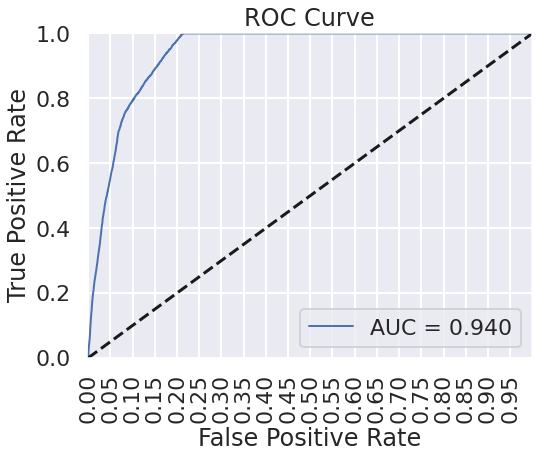

In [ ]:
auc_rf = roc_auc_score(ytest, rf_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, rf_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_rf)

#Features Importance

In [ ]:
features_tuple = list(zip(X.columns, clf_rf.feature_importances_))

In [ ]:
feature_imp = pd.DataFrame(features_tuple, columns=[
                           "Feature Names", "Importance"])

In [ ]:
feature_imp = feature_imp.sort_values("Importance", ascending=False)

Text(0.5, 1.0, 'Random Forest Classifier - Features Importance')

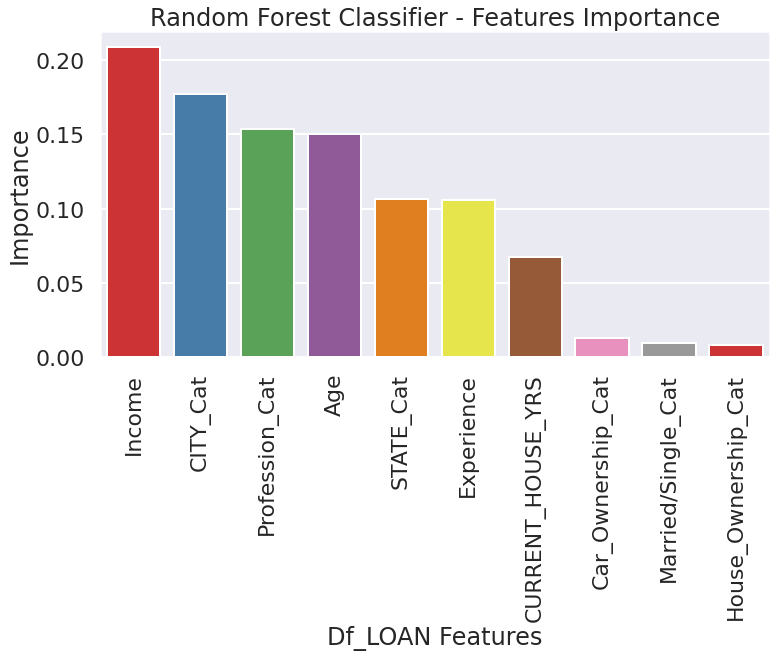

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Feature Names", y="Importance", data=feature_imp, color='b',palette='Set1')
plt.xlabel("Df_LOAN Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.title("Random Forest Classifier - Features Importance")

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(ytest, rf_pred).ravel()
conf_matrix = pd.DataFrame({"pred_defaulter":[tp,fp],"Pred_not_Defaulter":[fn,tn]},index=[" Actual Defaulters","Not Defaulter"])
conf_matrix

,pred_defaulter,Pred_not_Defaulter
Actual Defaulters,3352,2915
Not Defaulter,2079,42054


#Save Model using joblib:


In [ ]:
#import libraries
import joblib
filename = 'finalized_model.sav'
joblib.dump(clf_rf, open(filename, 'wb'))

#Save Model using Pickle:

In [ ]:
#import libraries
import pickle
filename = 'finalized_model.sav'
pickle.dump(clf_rf, open(filename, 'wb'))